In [1]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as scipyio
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[500/6000] Avg Total Reward 45.0360184129, DQN Loss 4.08520396799, Epsilon 0.606614065434
[1000/6000] Avg Total Reward 272.228386073, DQN Loss 1.94893963635, Epsilon 0.374533303502
[1500/6000] Avg Total Reward 461.802492372, DQN Loss 2.32552234828, Epsilon 0.233310198931
[2000/6000] Avg Total Reward 597.390760956, DQN Loss 2.69050733745, Epsilon 0.144294576635
[2500/6000] Avg Total Reward 662.035709223, DQN Loss 2.59731821343, Epsilon 0.0890363586723
[3000/6000] Avg Total Reward 701.115732597, DQN Loss 2.492690593, Epsilon 0.0547366031708
[3500/6000] Avg Total Reward 739.760333452, DQN Loss 2.34600776434, Epsilon 0.0333938013238
[4000/6000] Avg Total Reward 750.93667497, DQN Loss 1.6775832437, Epsilon 0.0204035310588
[4500/6000] Avg Total Reward 771.849530917, DQN Loss 2.36041853949, Epsilon 0.0124746137169
[5000/6000] Avg Total Reward 775.375927441, DQN Loss 1.78510603681, Epsilon 0.0076215774192
[5500/6000] Avg Total Reward 781.18221684, DQN Loss 1.88962546363, Epsilon 0.004653506514

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


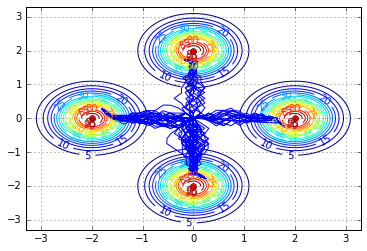

In [2]:
dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]

exp = multi_experiment.Experiments(seed=0,action_res=[5,5],nr_goal=4,discount=0.7,dqn_hidden_spec=dqn_hidden_spec,
                     max_epi=6000,max_step=20,
                     batch_size=2000,learning_rate=1e-4,target_update_period=25,
                     replay_memory_size=50000,eps_decay_rate=0.99995, strategy="Sparsemax",scale=3.)

return_list = exp.run(display_period=500)
eval_list, info_list = exp.evaluation(max_eval_epi=100)
exp.env.plot_paths(info_list)
plt.draw()
plt.pause(0.005)

In [3]:
import pickle
output = open('./multigoal_expert_demo.pkl', 'wb')
demonstrations = exp.demonstrations(max_demo=1000)
pickle.dump([demonstrations], output)
output.close()